In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd


In [2]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [3]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/fp.csv

In [4]:
df = pd.read_csv('fp.csv', delimiter=',')

Let's take a quick look at what the data looks like:

In [5]:
df.head(5)

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1.0,4.0,85.0,12.0,5152.0,253.0,52.0,305.0,34.0,302.0,1.0
1,2,2,0.0,0.0,86.0,4.0,5635.0,197.0,124.0,321.0,33.0,315.0,1.0
2,3,3,4.0,4.0,85.0,1.0,805.0,40.0,60.0,100.0,18.0,83.0,1.0
3,4,4,0.0,0.0,86.0,5.0,3829.0,200.0,119.0,319.0,30.0,303.0,1.0
4,5,5,0.0,0.0,86.0,4.0,2149.0,140.0,94.0,234.0,24.0,208.0,1.0


Distribution graphs (histogram/bar graph) of sampled columns:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               5000 non-null   int64  
 1   Project          5000 non-null   int64  
 2   TeamExp          4995 non-null   float64
 3   ManagerExp       4995 non-null   float64
 4   YearEnd          4995 non-null   float64
 5   Length           4995 non-null   float64
 6   Effort           4995 non-null   float64
 7   Transactions     4995 non-null   float64
 8   Entities         4995 non-null   float64
 9   PointsNonAdjust  4995 non-null   float64
 10  Adjustment       4995 non-null   float64
 11  PointsAjust      4995 non-null   float64
 12  Language         4995 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 507.9 KB


In [7]:
df.isna().sum()

id                 0
Project            0
TeamExp            5
ManagerExp         5
YearEnd            5
Length             5
Effort             5
Transactions       5
Entities           5
PointsNonAdjust    5
Adjustment         5
PointsAjust        5
Language           5
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 4994
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4995 non-null   int64  
 1   Project          4995 non-null   int64  
 2   TeamExp          4995 non-null   float64
 3   ManagerExp       4995 non-null   float64
 4   YearEnd          4995 non-null   float64
 5   Length           4995 non-null   float64
 6   Effort           4995 non-null   float64
 7   Transactions     4995 non-null   float64
 8   Entities         4995 non-null   float64
 9   PointsNonAdjust  4995 non-null   float64
 10  Adjustment       4995 non-null   float64
 11  PointsAjust      4995 non-null   float64
 12  Language         4995 non-null   float64
dtypes: float64(11), int64(2)
memory usage: 546.3 KB


In [10]:
df.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,2498.000000,2498.000000,2.191191,2.522523,85.727728,11.609610,5032.516517,180.990991,122.394394,303.385385,27.693694,288.265265,1.545546
std,1442.076628,1442.076628,1.408141,1.634150,1.212314,7.340464,4361.225891,142.058437,84.531386,177.807275,10.449560,183.192057,0.698759
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,1249.500000,1249.500000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,2498.000000,2498.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,3746.500000,3746.500000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,4995.000000,4995.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [11]:
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# scaler = MinMaxScaler()
# df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [12]:
df.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,2498.000000,2498.000000,2.191191,2.522523,85.727728,11.609610,5032.516517,180.990991,122.394394,303.385385,27.693694,288.265265,1.545546
std,1442.076628,1442.076628,1.408141,1.634150,1.212314,7.340464,4361.225891,142.058437,84.531386,177.807275,10.449560,183.192057,0.698759
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,1249.500000,1249.500000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,2498.000000,2498.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,3746.500000,3746.500000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,4995.000000,4995.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [13]:
df = df.drop(columns="id")

In [14]:
df.describe()

,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,2498.000000,2.191191,2.522523,85.727728,11.609610,5032.516517,180.990991,122.394394,303.385385,27.693694,288.265265,1.545546
std,1442.076628,1.408141,1.634150,1.212314,7.340464,4361.225891,142.058437,84.531386,177.807275,10.449560,183.192057,0.698759
min,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,1249.500000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,2498.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,3746.500000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,4995.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


In [15]:
X = df.drop(columns=['Effort'])
y = df['Effort']

In [16]:
X.shape

(4995, 11)

In [17]:
y.shape

(4995,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 5356718.098429395
R-squared: 0.6856736325877038


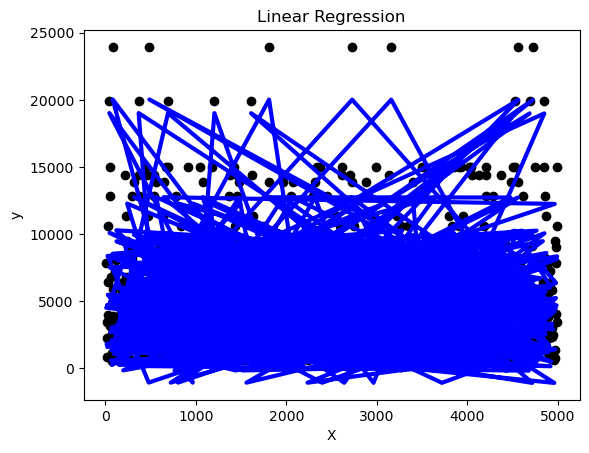

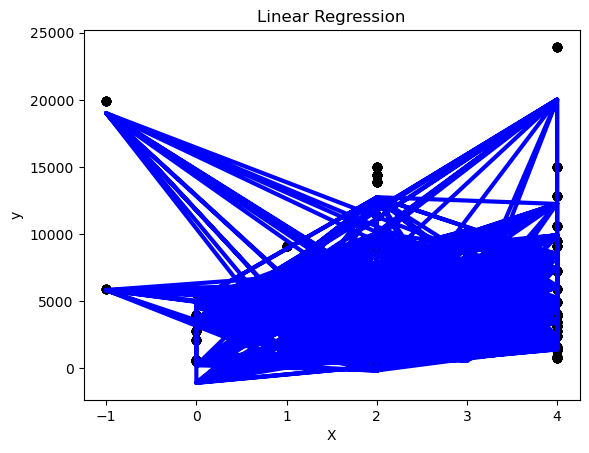

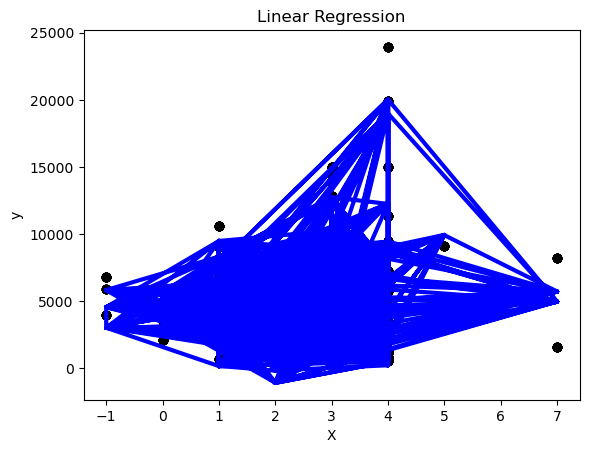

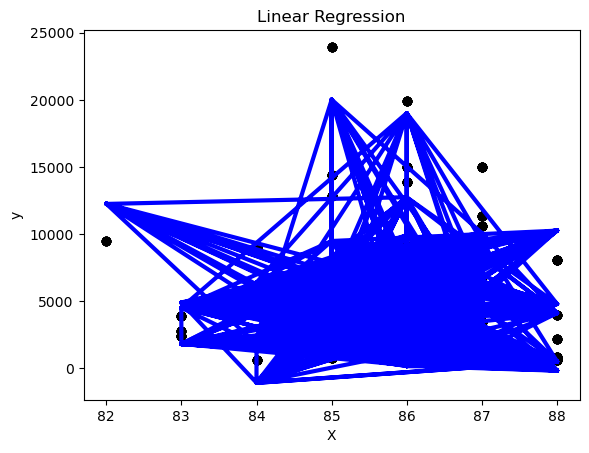

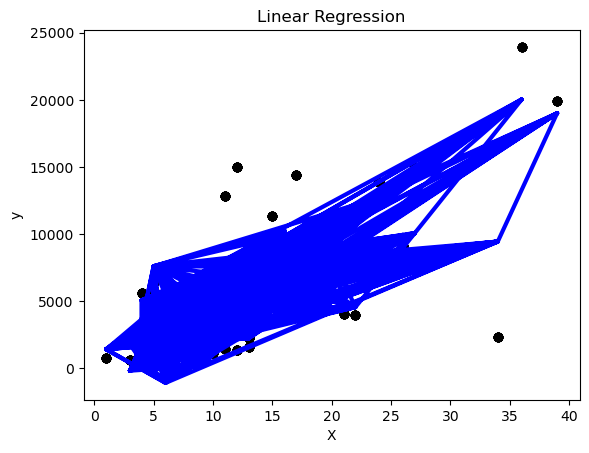

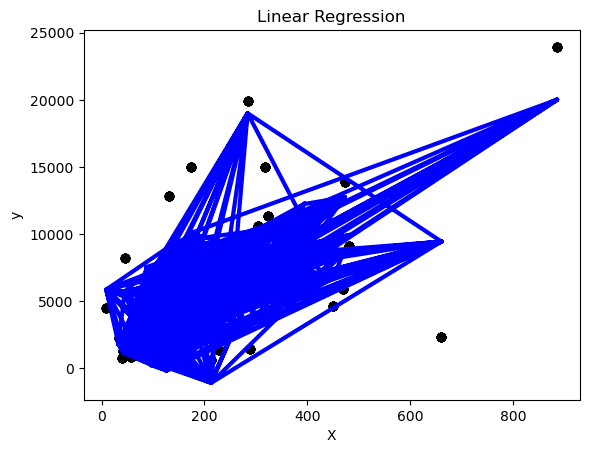

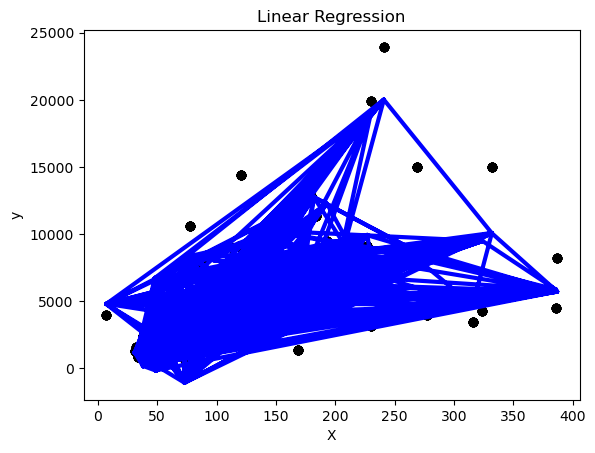

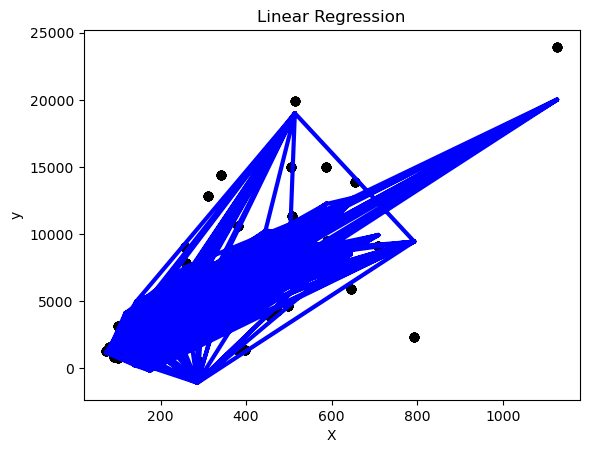

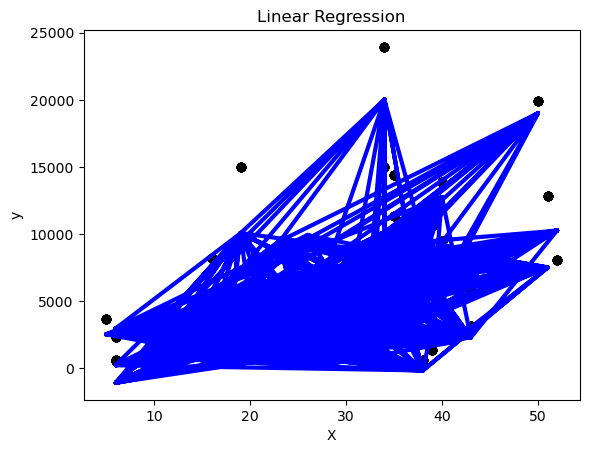

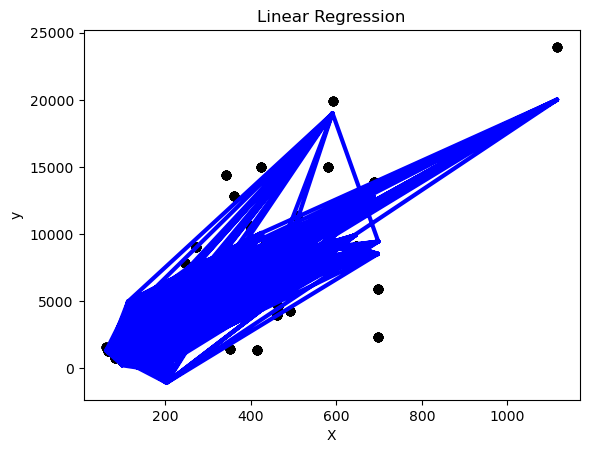

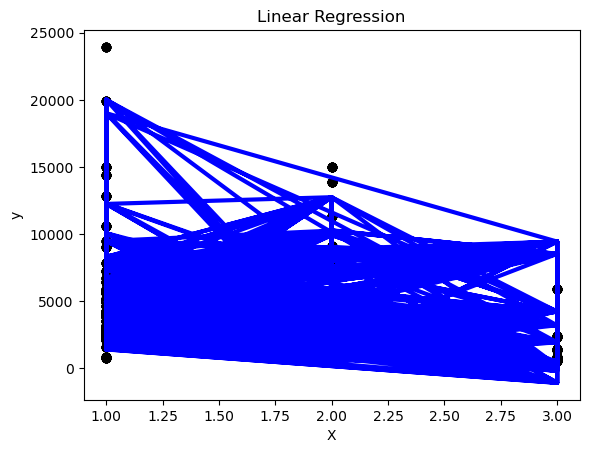

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

for i in range(11):
    plt.scatter(X_test.iloc[:,i], y_test, color='black')
    plt.plot(X_test.iloc[:,i], y_pred, color='blue', linewidth=3)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.show()



Ridge Mean Squared Error: 5356780.394913818
R-squared: 0.6856736325877038


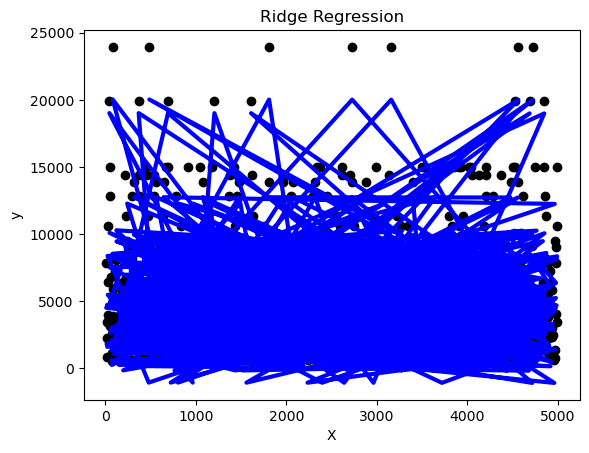

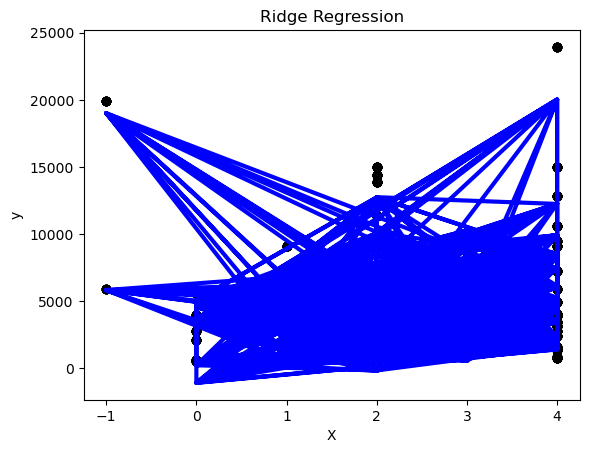

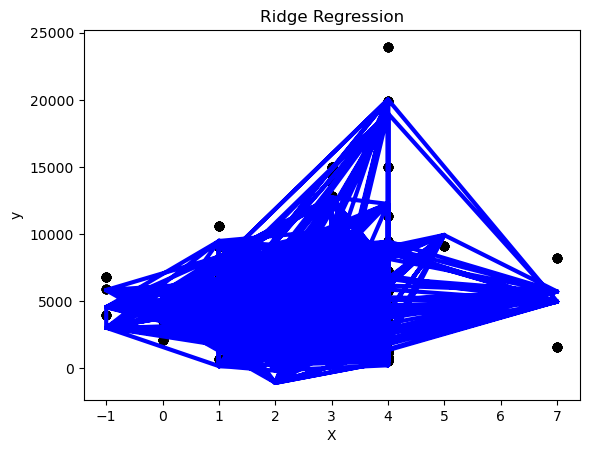

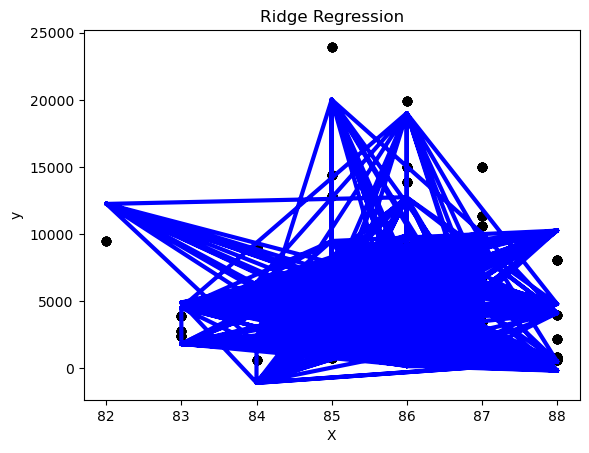

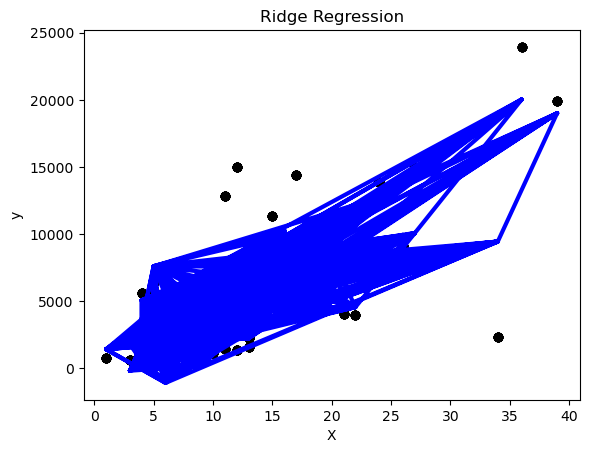

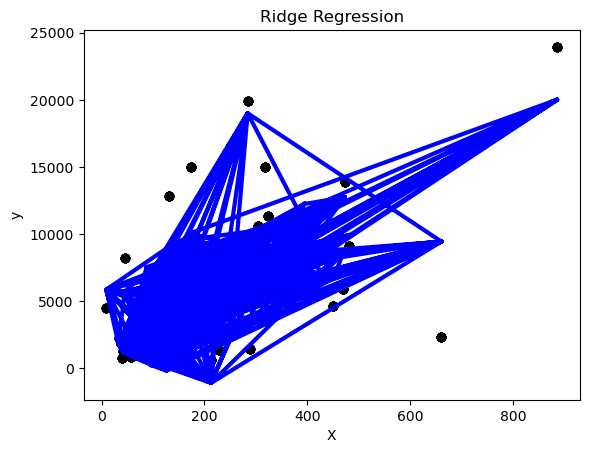

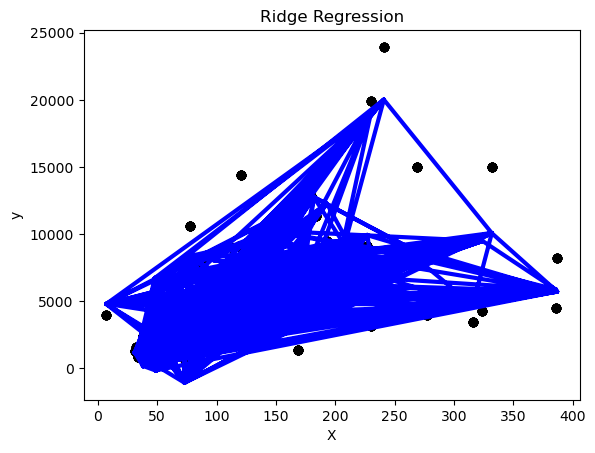

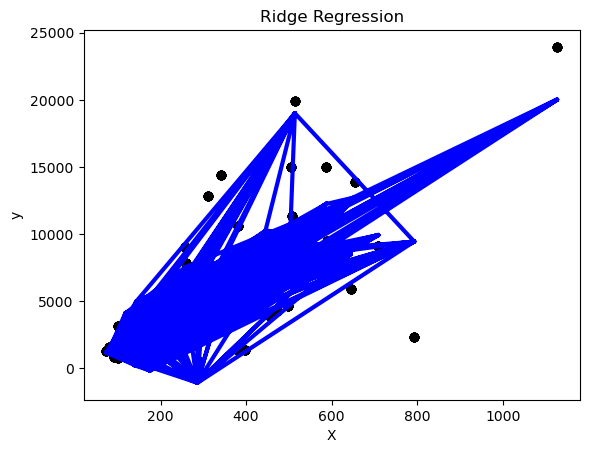

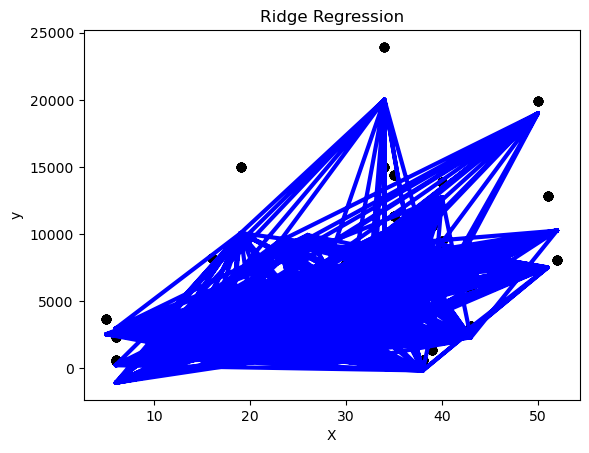

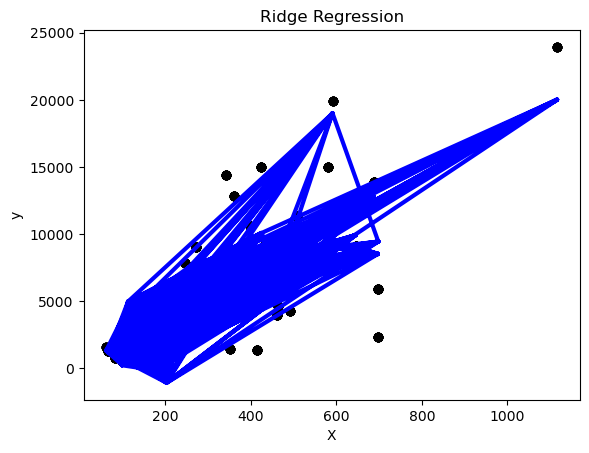

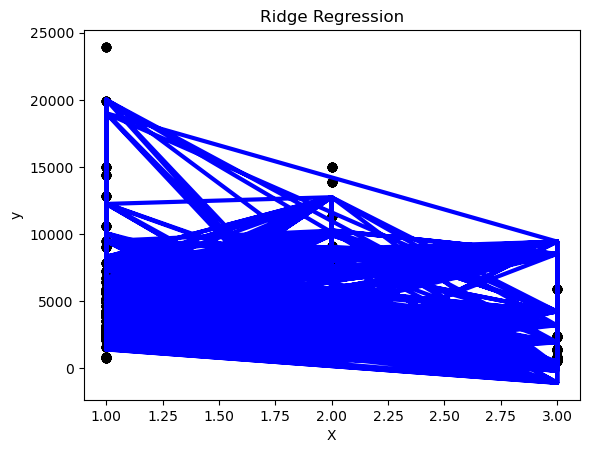

In [23]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f'Ridge Mean Squared Error: {ridge_mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

for i in range(11):
    plt.scatter(X_test.iloc[:,i], y_test, color='black')
    plt.plot(X_test.iloc[:,i], y_pred, color='blue', linewidth=3)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Ridge Regression')
    plt.show()

C:\Users\Syfullakhan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.112e+09, tolerance: 7.793e+06
  model = cd_fast.enet_coordinate_descent(


Lasso Mean Squared Error: 5356583.117685396
R-squared: 0.6856736325877038


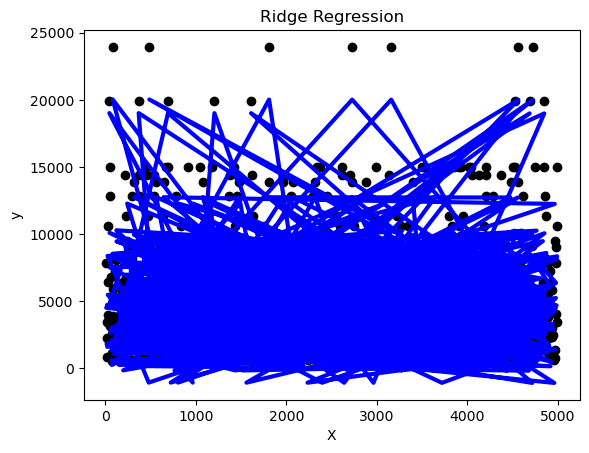

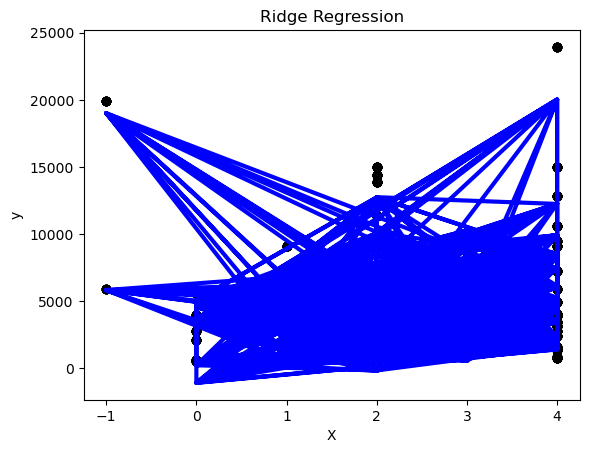

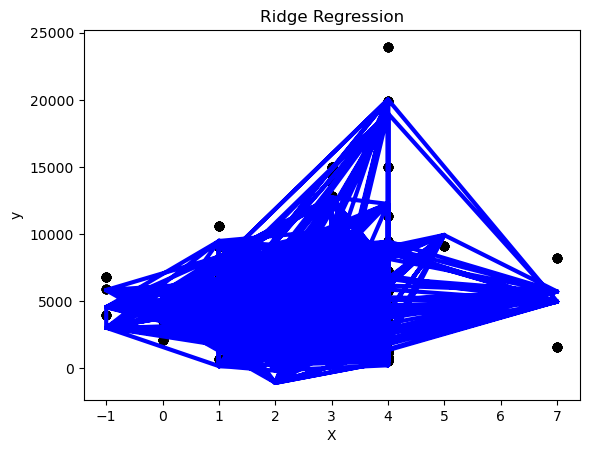

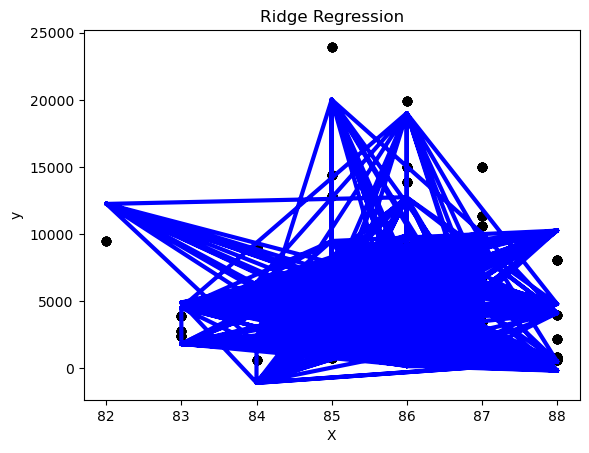

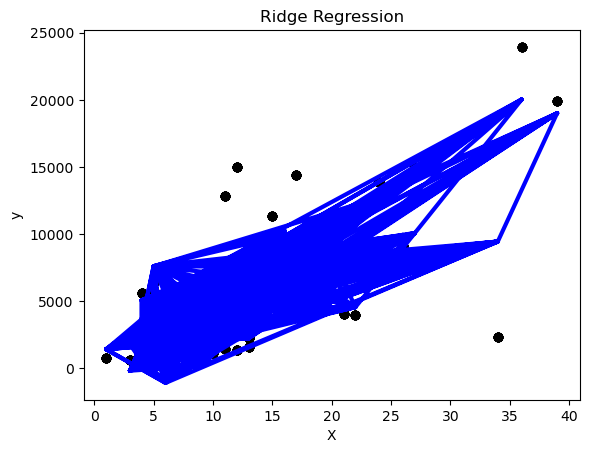

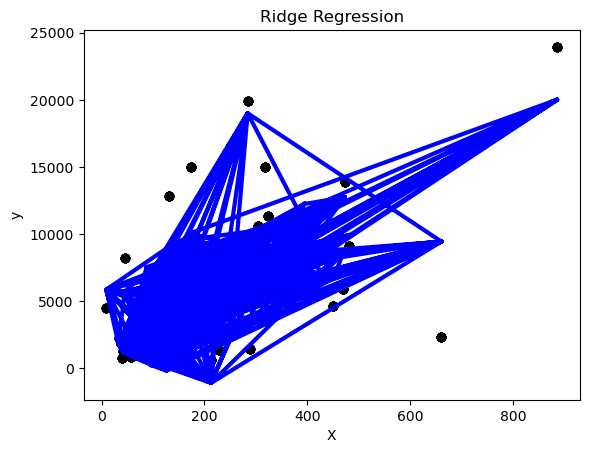

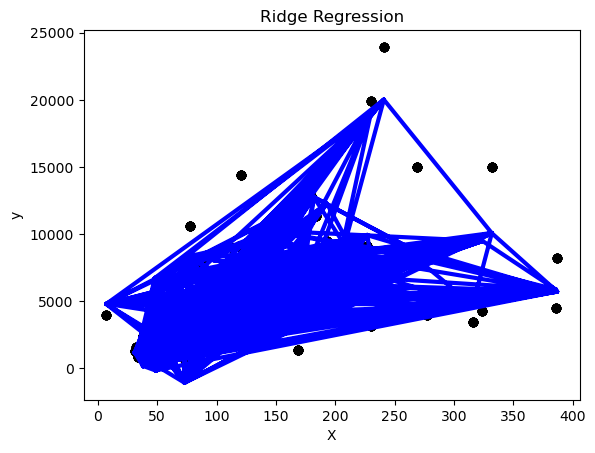

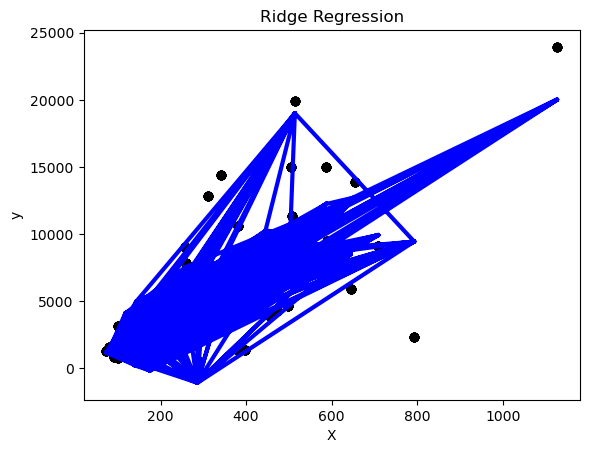

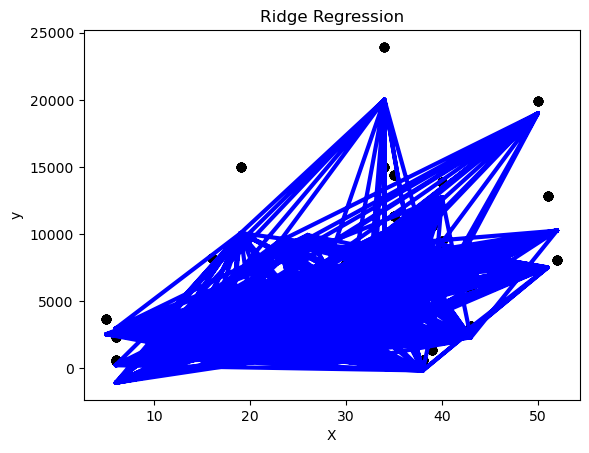

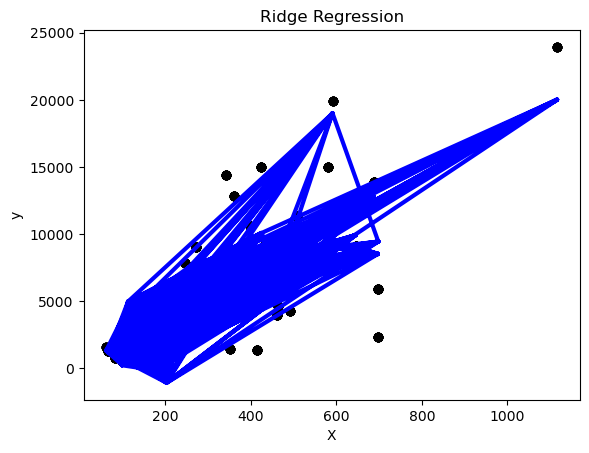

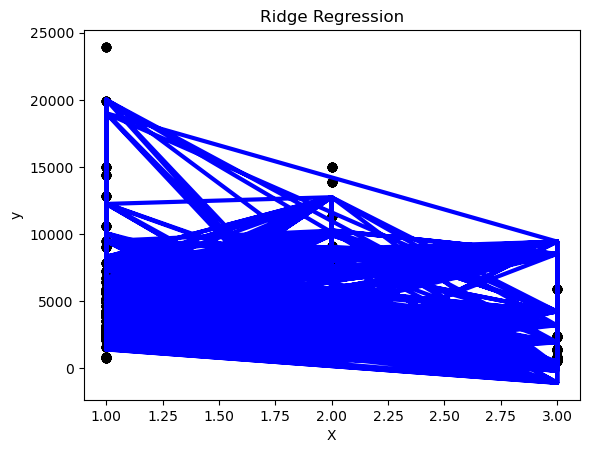

In [22]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Evaluate the Lasso model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f'Lasso Mean Squared Error: {lasso_mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

for i in range(11):
    plt.scatter(X_test.iloc[:,i], y_test, color='black')
    plt.plot(X_test.iloc[:,i], y_pred, color='blue', linewidth=3)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Ridge Regression')
    plt.show()